In [1]:
#predict the type of iris flower after training the ml algorithm
#inputs- sepal length, petal length, sepal width, petal width
#outputs- versicolor, setosa, virginica
#1. dataset analyis and preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data analysis and Preprocessing

In [2]:
data=pd.read_csv("C:/Users/preet/Desktop/Internship/Bharat/Iris Flower Classification/Iris Flower Dataset.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


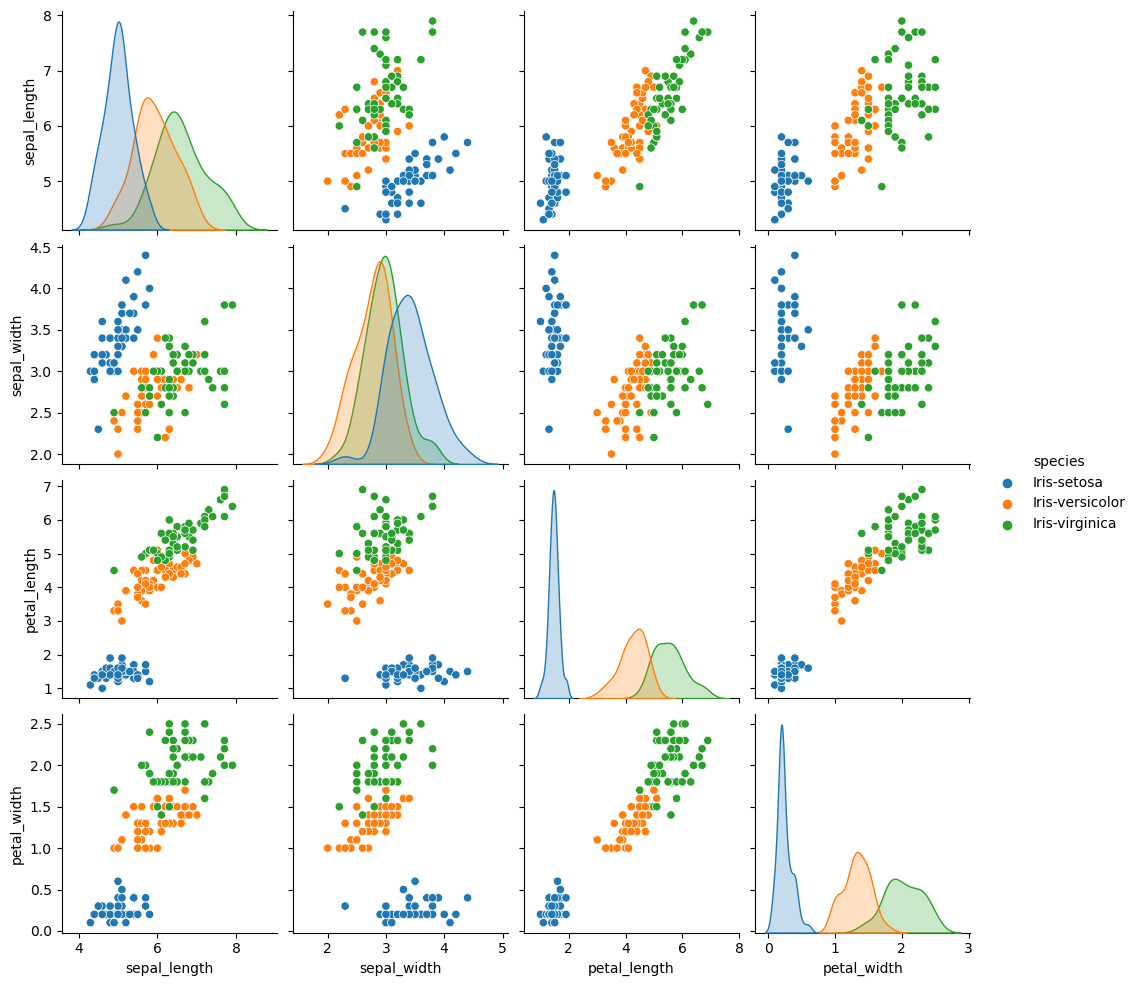

In [6]:
sns.pairplot(data,hue='species')

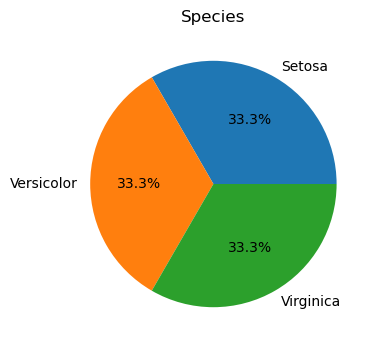

In [7]:
#setosa is easily differentiable from other
#iris virginica is the longest flower and iris setosa is the shortest.
plt.figure(figsize=(8,4))
number=data['species'].value_counts()
plt.pie(number, labels=['Setosa','Versicolor','Virginica'],autopct='%1.1f%%') 
plt.title('Species')
plt.show()

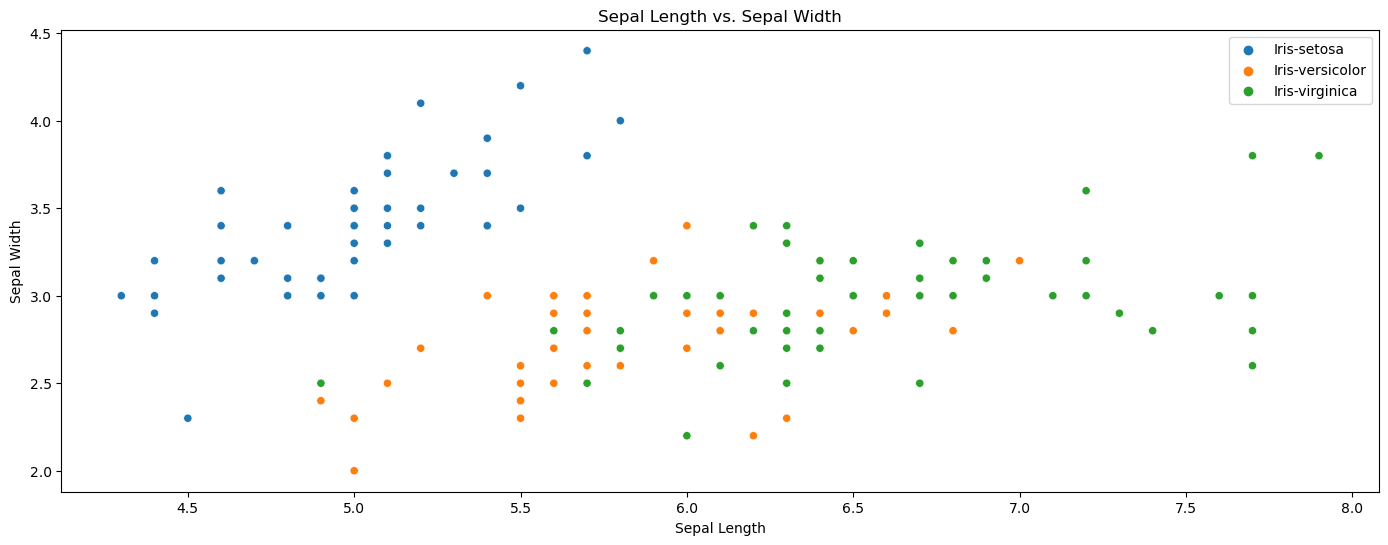

In [8]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper right')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [11]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
categorical_columns= data.select_dtypes(include=['object'])
label_encoder= LabelEncoder()
for col in categorical_columns:
    data[col]= label_encoder.fit_transform(data[col])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
data['species'].unique()

array([0, 1, 2])

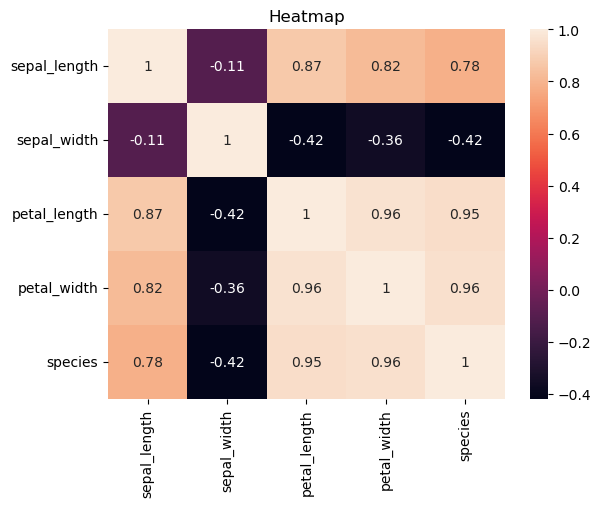

In [15]:
#correlation analysis 
sns.heatmap(data[['sepal_length','sepal_width','petal_length','petal_width','species']].corr(),annot=True)
plt.title("Heatmap")
plt.show()

# Splitting Dataset

In [16]:
# Splitting dataset
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

In [17]:
y=data[['species']].values
x=data.drop(['species'],axis=1).values
print(x.shape)
print(y.shape)

(150, 4)
(150, 1)


In [18]:
X_train, X_test ,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#80 percent training, 20 percent testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 1)
(30, 4)
(30, 1)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training Models

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

In [32]:
lr.fit(X_train,y_train.ravel())

LogisticRegression(random_state=0)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, lr_predict)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [36]:
accuracy_score(y_test, lr_predict)

1.0

### SVM 

In [26]:
from sklearn.svm import SVC 
model2 = SVC(kernel='linear',random_state=0)
model2.fit(X_train,y_train.ravel())

SVC(kernel='linear', random_state=0)

In [28]:
# Predict from the test dataset
from sklearn.metrics import confusion_matrix
svm_predict = model2.predict(X_test)
cm = confusion_matrix(y_test,svm_predict)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [30]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_predict)

1.0

### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
model3.fit(X_train, y_train)
y_pred2 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.9666666666666667


C:\Users\preet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\preet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
